In [11]:
import os

# Fix to be able to import python modules inside a notebook
os.chdir("..")

In [66]:
!cd AI_PROJECT
!dir 

In [64]:
import numpy as np
from matplotlib import pyplot as plt
from AI_PROJECT.aiproject import func


x_train = np.array([1.0, 3.0, 1.5, 1.8, 2.5, 2.8])
y_train = np.array([300, 500, 350, 380, 420, 475])

m = len(x_train)  # m is the number of training examples
print(f"number of training examples: {m}")


number of training examples: 6


In [53]:
import pandas as pd

In [54]:
TRAIN_CSV_PATH = "AI_PROJECT/data/train.csv"
train_df = pd.read_csv(TRAIN_CSV_PATH)

In [75]:
"""Split on train / val / test  60/20/20 """
train_df  # found out how many rows
train_dataset = train_df[:1800]  # 60%
val_dataset = train_df[1800:2400]  # 20%
test_dataset = train_df[2400:]  # 20%

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1800,1801,NaN,5,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt0144134,en,The Cherry Orchard,Madame Ranevskaya (Rampling) is a spoiled agin...,0.001880,...,1/1/99,141.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Cherry Orchard,NaN,[],"[{'credit_id': '52fe471bc3a36847f8123c13', 'de...",135
1801,1802,NaN,3500000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0165494,en,Ringmaster,"Jerry Springer stars as more or less himself, ...",0.556435,...,11/25/98,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Ringmaster,"[{'id': 3741, 'name': 'talk show'}, {'id': 209...","[{'cast_id': 3, 'character': 'Jerry Farrelly',...","[{'credit_id': '52fe46539251416c91050d75', 'de...",9247881
1802,1803,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0391304,en,A Lot Like Love,"On a flight from Los Angeles to New York, Oliv...",10.596719,...,4/22/05,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's nothing better than a great romance......,A Lot Like Love,"[{'id': 242, 'name': 'new york'}, {'id': 367, ...","[{'cast_id': 8, 'character': 'Oliver Martin', ...","[{'credit_id': '564d1f8bc3a3686037008913', 'de...",42886719
1803,1804,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0914382,en,Quiet City,Jamie is 21. She's from Atlanta. She's come to...,0.404753,...,3/12/07,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Quiet City,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 1000, 'character': 'Jamie', 'cred...","[{'credit_id': '52fe4712c3a36847f8121ef5', 'de...",15425
1804,1805,NaN,3800000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0040897,en,The Treasure of the Sierra Madre,"Fred C. Dobbs and Bob Curtin, both down on the...",8.070589,...,1/24/48,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The nearer they get to their treasure, the far...",The Treasure of the Sierra Madre,"[{'id': 534, 'name': 'mexico'}, {'id': 1321, '...","[{'cast_id': 9, 'character': 'Fred C. Dobbs', ...","[{'credit_id': '52fe4385c3a36847f805a4fd', 'de...",4307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt4082068,fr,Dheepan,Dheepan is a Sri Lankan Tamil warrior who flee...,5.752416,...,8/26/15,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,When the war continues to rage in your heart a...,Dheepan,"[{'id': 90, 'name': 'paris'}, {'id': 254, 'nam...","[{'cast_id': 5, 'character': 'Dheepan', 'credi...","[{'credit_id': '5562176d92514171ab002620', 'de...",248392
2396,2397,NaN,60000000,"[{'id': 18, 'name': 'Drama'}]",http://www.sonypictures.com/movies/eatpraylove/,tt0879870,en,Eat Pray Love,Liz Gilbert had everything a modern woman is s...,15.904834,...,8/12/10,133.0,"[{'iso_639_1': 'pt', 'name': 'Português'}, {'i...",Released,Let Yourself GO,Eat Pray Love,"[{'id': 7348, 'name': 'indonesia'}, {'id': 113...","[{'cast_id': 4, 'character': 'Elizabeth Gilber...","[{'credit_id': '52fe469c9251416c91059ee1', 'de...",204594016
2397,2398,NaN,80000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt0117438,en,Ransom,"When a rich man's son is kidnapped, he coopera...",8.772188,...,11/8/96,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Someone is going to pay.,Ransom,"[{'id': 800, 'name': 'bounty'}, {'id': 1452, '...","[{'cast_id': 1, 'character': 'Tom Mullen', 'cr...","[{'credit_id': '52fe43a0c3a36847f8062ca7', 'de...",309492681
2398,2399,NaN,18000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt1967545,en,Labor Day,Depressed single mom Adele and her son Henry o...,6.108646,...,12/27/13,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Labor Day,"[{'id': 12414, 'name': 'escaped convict'}, {'i...","[{'cast_id': 5

In [56]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [57]:
features = train_df[["budget", "popularity"]]
features.columns
features = features[features["budget"] > 0]
features = features[features["popularity"] > 0]

features.dropna(subset=["budget"], inplace=True)
features.dropna(subset=["popularity"], inplace=True)

features.sample(10)

,budget,popularity
1278,5000000,5.587765
115,25000000,5.007250
2797,4000000,5.317544
1832,1250000,12.745640
1384,20000000,5.762343
1855,16000000,6.493474
1337,1200000,4.928139
226,50000000,7.668829
827,10000000,3.759301
519,32000000,8.074218


In [58]:
features

# 1. Удалить строки с нулевым бюджетом (проверить, что нет пропусков NaN, Null)  Done


# 2. Нормировать данные (min/max scaling, standard scaling)
# 3. Написать функцию для подсчёта функции потерь
# 4. Написать шаг оптимизации параметров MSE + градиентный спуск.

# Подумать, что делать с не числовыми признаками? Как их интерпретировать?
# binary encoding, OHE one hot encoding e.t.c.

features.describe()

w1 = 0.00000001
w2 = 100

In [59]:
train_x = features.to_numpy()

In [60]:
target = train_df["revenue"]

In [61]:
target

0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 3000, dtype: int64

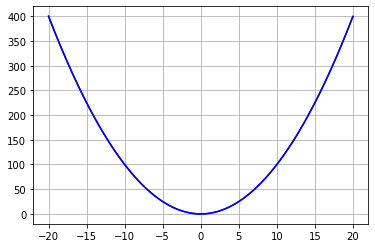

In [76]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)


plt.plot(x_vals, y_vals, "blue")
plt.plot(x_vals, y_vals, "blue")
plt.grid(True, which="major")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2188,) and (6,)

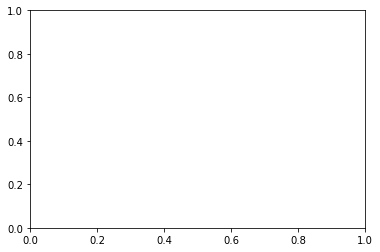

In [77]:
x_train = list(features["budget"].values)
y_train = list(features["popularity"].values)


plt.plot(x_train, tmp_f_wb, c="b", label="Our Prediction")
plt.scatter(x_train, y_train, marker="x", c="r", label="Actual price")
plt.xlabel("Sixe")
plt.ylabel("Price")
plt.legend()
plt.show()